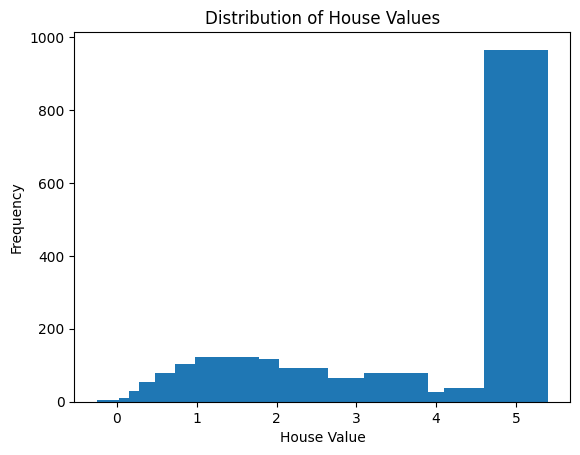

In [8]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets._california_housing import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

california_housing = fetch_california_housing()
x = california_housing.data
y = california_housing.target

# Data classes distribution
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.title('Distribution of House Values')
plt.show()

# Preprocessing & Model Training

In [43]:
_xtrain, test_x, _ytrain, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
_xtrain_scaled = scaler.fit_transform(_xtrain)
test_x_scaled = scaler.transform(test_x)

train_x, val_x, train_y, val_y = train_test_split(_xtrain_scaled, _ytrain, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(train_x.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['r2_score', 'root_mean_squared_error'])


In [45]:
fit_history = model.fit(train_x, train_y, epochs=30, validation_data=(val_x, val_y))

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8106 - r2_score: 0.3886 - root_mean_squared_error: 0.9004 - val_loss: 0.5954 - val_r2_score: 0.5685 - val_root_mean_squared_error: 0.7716
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5168 - r2_score: 0.6102 - root_mean_squared_error: 0.7189 - val_loss: 0.5096 - val_r2_score: 0.6307 - val_root_mean_squared_error: 0.7139
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4599 - r2_score: 0.6531 - root_mean_squared_error: 0.6781 - val_loss: 0.4966 - val_r2_score: 0.6401 - val_root_mean_squared_error: 0.7047
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4278 - r2_score: 0.6773 - root_mean_squared_error: 0.6541 - val_loss: 0.4426 - val_r2_score: 0.6793 - val_root_mean_squared_error: 0.6653
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4117 - r2_score: 0.6895 - root_mean_squared_error: 0.6416 - val_loss: 0.4386 - val_r2_score: 0.6821 - val_root_mean_squared_error: 0.6623


# Evaluation

In [46]:
model.evaluate(test_x, test_y, verbose=1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9103.6865 - r2_score: -6946.2109 - root_mean_squared_error: 95.4132  


[9103.6865234375, -6946.2109375, 95.41323852539062]